# Генерация дополнительных строковых фичей. Практика

## Цели практической работы
1. Потренироваться генерировать дополнительные признаки с помощью lambda-функций.
2. Потренироваться генерировать дополнительные строковые признаки.
3. Подготовить датасет к этапу моделирования.

## Что входит в практическую работу
1. Загрузить датасет и ознакомиться с ним.
2. Сгенерировать дополнительные признаки для этапа моделирования, используя lambda-функции и функции над строками.

## Задача

Мы продолжим исследовать и готовить данные для этапа моделирования.

Вам предстоит работать с небольшой выборкой из коллекции подержанных автомобилей, выставленных на продажу в Соединённых Штатах, представленной в файле `data/vehicles_dataset_upd.csv`. На этих данных вы построите первую модель классификации, определяющую категорию цены подержанного автомобиля в зависимости от характеристик транспортного средства.

В этой практической работе вы начнете генерировать дополнительные признаки.


## Описание датасета:
- `id`: идентификатор записи;
- `url`: URL-записи о продаже;
- `region`: регион;
- `region_url`: URL региона;
- `price`: стоимость;
- `year`: год выпуска;
- `manufacturer`: производитель;
- `model`: модель;
- `condition`: состояние;
- `cylinders`: количество цилиндров;
- `fuel`: тип топлива;
- `odometer`: количество пройденных миль;
- `title_status`: статус;
- `transmission`: коробка передач;
- `VIN`: идентификационный номер;
- `drive`: тип привода;
- `size`: размер;
- `type`: кузов;
- `paint_color`: цвет;
- `image_url`: URL изображения;
- `description`: указанное описание;
- `county`: страна;
- `state`: штат;
- `lat`: широта;
- `long`: долгота;
- `posting_date`: дата размещения объявления о продаже;
- `price_category`: категория цены.


In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Задача 1. Изменение шкалы признака

1. Загрузите датасет из `data/vehicles_dataset_upd4.csv`, выведите первые пять записей и список колонок.


In [10]:
df = pd.read_csv("./20.2_vehicles_dataset_upd4.csv")

In [11]:
df.head()

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,...,posting_date,price_category,date,odometer_km,odometer/price,region_new,region_corrected,manufacturer_model,desc_len,model_in_desc
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020,ram,2500 crew cab big horn,diesel,27442,...,2021-04-17T12:30:50-0400,high,2021-04-17 16:30:50+00:00,44163.618048,0.499036,chattanooga,chattanooga,ram: 2500 crew cab big horn,4482,0
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016,ford,explorer 4wd 4dr xlt,other,60023,...,2021-05-03T15:40:21-0400,medium,2021-05-03 19:40:21+00:00,96597.654912,3.542852,newjersey,northjersey,ford: explorer 4wd 4dr xlt,968,0
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017,volkswagen,golf r hatchback,gas,14048,...,2021-04-28T03:52:20-0700,high,2021-04-28 10:52:20+00:00,22608.064512,0.394718,reno,reno,volkswagen: golf r hatchback,4286,0
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013,toyota,rav4,gas,117291,...,2021-04-17T10:08:57-0400,medium,2021-04-17 14:08:57+00:00,188761.567104,8.089034,fayetteville,fayetteville,toyota: rav4,3241,0
4,7303797340,https://knoxville.craigslist.org/ctd/d/knoxvil...,knoxville,https://knoxville.craigslist.org,14590,2012,bmw,1 series 128i coupe 2d,other,80465,...,2021-04-08T15:10:56-0400,medium,2021-04-08 19:10:56+00:00,129495.864960,5.515079,knoxville,knoxville,bmw: 1 series 128i coupe 2d,4851,0


In [12]:
df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'fuel', 'odometer', 'title_status', 'transmission',
       'image_url', 'description', 'state', 'lat', 'long', 'posting_date',
       'price_category', 'date', 'odometer_km', 'odometer/price', 'region_new',
       'region_corrected', 'manufacturer_model', 'desc_len', 'model_in_desc'],
      dtype='object')

2. С помощью lambda-функции или без неё создайте признак `price_k$`, обозначающий стоимость автомобиля в тысячах долларов. Округлите и выведите получившиеся значения.

In [13]:
%%time
df["price_k$"] = round(df["price"] / 1000)

CPU times: total: 0 ns
Wall time: 999 μs


In [14]:
%%time
df["price_k$_2"] = df.apply(lambda x: round(x.price / 1000), axis=1)

CPU times: total: 93.8 ms
Wall time: 73.9 ms


In [15]:
df[["price_k$", "price"]]

,price_k$,price
0,55.0,54990
1,17.0,16942
2,36.0,35590
3,14.0,14500
4,15.0,14590
...,...,...
9614,4.0,4495
9615,14.0,14495
9616,9.0,8995
9617,32.0,31900


3. Посчитайте коэффициент корреляции Пирсона для стоимости автомобиля в долларах и в округлённых тысячах долларов и подумайте, почему получилось такое значение.

In [16]:
df["price"].corr(df["price_k$"])

np.float64(0.999798702437405)

значение не 100 потому что было округление

In [17]:
df["price"].corr(df.apply(lambda x: x.price / 1000, axis=1))

np.float64(0.9999999999999994)

### Задача 2. Построение категориального признака на основе количественного

1. Выведите описательные статистики для переменной `year`.

In [20]:
df["year"].describe()

count    9619.000000
mean     2011.555879
std         6.385814
min      1995.000000
25%      2008.000000
50%      2013.000000
75%      2017.000000
max      2020.000000
Name: year, dtype: float64

2. Создайте с помощью lambda-функции новый признак `age_category`, обозначающий возрастную категорию автомобиля, выведите его.

Будет три категории:
- `new` — автомобиль старше 2013 года выпуска;
- `average`— автомобиль, выпущенный между 2006 и 2013 годом;
- `old` — автомобиль до 2006 года выпуска.

In [22]:
df["age_category"] = df["year"].apply(
    lambda x: "new" if x > 2013 else ("old" if x < 2006 else "average")
)

In [26]:
df["age_category"]

0           new
1           new
2           new
3       average
4       average
         ...   
9614        old
9615    average
9616    average
9617        new
9618        new
Name: age_category, Length: 9619, dtype: object

3. Выведите значения года выпуска автомобиля и получившуюся возрастную категорию автомобиля, чтобы убедиться в правильности распределения категорий.

In [25]:
df[["year", "age_category"]]

,year,age_category
0,2020,new
1,2016,new
2,2017,new
3,2013,average
4,2012,average
...,...,...
9614,2002,old
9615,2008,average
9616,2011,average
9617,2015,new


1. На одном полотне постройте графики распределения года производства автомобиля для каждой из возрастной категории автомобиля. Настройти общий размер фигуры — 12x8, цвета в зависимости от возрастной категории: зелёный, оранжевый и красный для новых, средних и старых автомобилей соответственно. Не забудьте подписать название графика и оси, а также вывести легенду для возрастной категории.


Text(0.5, 1.0, 'Распределение года производства автомобиля для разных возрастных категорий')

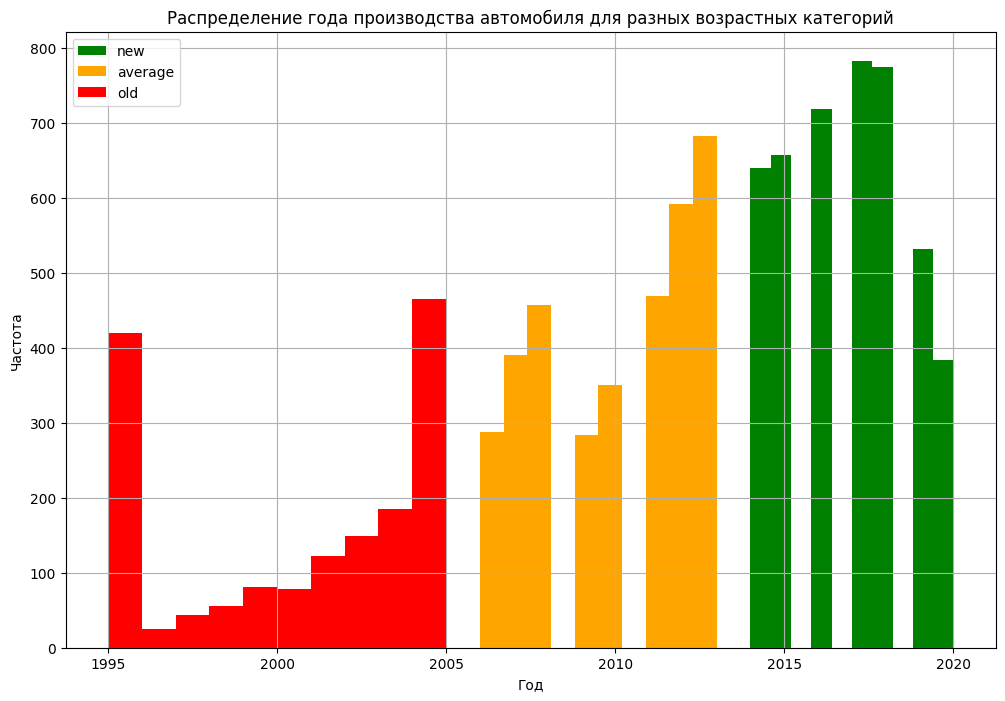

In [34]:
plt.figure(figsize=(12, 8))

colors = {"new": "green", "average": "orange", "old": "red"}


for category, color in colors.items():
    plt.hist(df[df["age_category"] == category]["year"], color=color, label=category)

plt.legend()
plt.grid()
plt.xlabel("Год")
plt.ylabel("Частота")
plt.title("Распределение года производства автомобиля для разных возрастных категорий")


### Задача 3. Построение признаков из строк

1. Создайте новый признак `model_len`, обозначающий количество символов (длину строки) в модели автомобиля, выведите его.

In [42]:
df["model_len"] = df["model"].apply(len)


In [43]:
df["model_len"]

0       22
1       20
2       16
3        4
4       22
        ..
9614     4
9615     8
9616    25
9617     7
9618    22
Name: model_len, Length: 9619, dtype: int64

2. С помощью `value_counts` посмотрите на самое популярное количество символов в модели автомобиля.

In [44]:
df["model_len"].value_counts()

model_len
6      1004
5       900
7       724
8       681
4       647
       ... 
118       1
161       1
181       1
91        1
186       1
Name: count, Length: 65, dtype: int64


3. Создайте новый признак `model_word_count`, обозначающий количество слов в модели автомобиля, выведите его.

In [45]:
df["model_word_count"] = df["model"].apply(lambda x: len(x.split()))

In [46]:
df["model_word_count"] 

0       5
1       4
2       3
3       1
4       5
       ..
9614    1
9615    1
9616    5
9617    1
9618    5
Name: model_word_count, Length: 9619, dtype: int64

4. С помощью `value_counts` посмотрите на самое популярное количество слов в модели автомобиля.

In [47]:
df["model_word_count"].value_counts()

model_word_count
1     4289
2     2184
3     1355
4     1182
5      499
6       67
10       8
8        7
9        5
11       5
7        4
13       3
15       3
27       1
21       1
14       1
17       1
24       1
12       1
29       1
22       1
Name: count, dtype: int64

### Задача 4. Создание нескольких признаков из категориальной переменной

1. Для каждого выбранного производителя автомобиля создайте отдельный признак, содержащий 1, если данный автомобиль произведён именно этим производителем, и 0, если нет. Назовите признаки согласно шаблону: для `audi` это будет `is_audi` и так далее.

In [48]:
manufacturer_names = ['audi', 'ford', 'chevrolet', 'toyota', 'jeep', 'honda', 'nissan']

for manufacturer in manufacturer_names:
    df["is_"+manufacturer] = df["manufacturer"].apply(lambda x: 1 if x == manufacturer else 0)

2. Выведите 7 последних колонок, чтобы убедиться в правильности вывода.

In [50]:
df.iloc[:, -7:]

,is_audi,is_ford,is_chevrolet,is_toyota,is_jeep,is_honda,is_nissan
0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...
9614,0,0,0,1,0,0,0
9615,0,0,0,0,1,0,0
9616,1,0,0,0,0,0,0
9617,0,0,0,0,0,0,0


3. Выведите только те автомобили, которые произведены audi. Сделайте это на основе нового признака `is_audi`.

In [51]:
df[df["is_audi"] == 1]

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,...,age_category,model_len,model_word_count,is_audi,is_ford,is_chevrolet,is_toyota,is_jeep,is_honda,is_nissan
58,7308399412,https://slo.craigslist.org/ctd/d/grover-beach-...,san luis obispo,https://slo.craigslist.org,9995,2010,audi,q5,gas,165714,...,average,2,1,1,0,0,0,0,0,0
104,7311352618,https://baltimore.craigslist.org/ctd/d/cockeys...,baltimore,https://baltimore.craigslist.org,33499,2018,audi,q7,gas,46529,...,new,2,1,1,0,0,0,0,0,0
125,7306308183,https://montgomery.craigslist.org/ctd/d/montgo...,montgomery,https://montgomery.craigslist.org,29590,2018,audi,q5 premium sport utility 4d,gas,34476,...,new,27,5,1,0,0,0,0,0,0
195,7315205542,https://denver.craigslist.org/ctd/d/littleton-...,denver,https://denver.craigslist.org,15598,2013,audi,a6,gas,81640,...,average,2,1,1,0,0,0,0,0,0
251,7302069239,https://indianapolis.craigslist.org/ctd/d/indi...,indianapolis,https://indianapolis.craigslist.org,38990,2018,audi,s5 premium plus sedan 4d,gas,40118,...,new,24,5,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9508,7313590324,https://reno.craigslist.org/cto/d/incline-vill...,reno / tahoe,https://reno.craigslist.org,28000,2014,audi,s6,gas,69000,...,new,2,1,1,0,0,0,0,0,0
9551,7316331812,https://indianapolis.craigslist.org/ctd/d/indi...,indianapolis,https://indianapolis.craigslist.org,10995,2011,audi,q7 premium plus,gas,140014,...,average,15,3,1,0,0,0,0,0,0
9559,7314775851,https://indianapolis.craigslist.org/cto/d/indi...,indianapolis,https://indianapolis.craigslist.org,13500,2012,audi,q5,gas,78000,...,average,2,1,1,0,0,0,0,0,0
9570,7316569161,https://chicago.craigslist.org/chc/cto/d/chica...,chicago,https://chicago.craigslist.org,8500,2009,audi,q7 3.6 premium quattro,gas,152000,...,average,22,4,1,0,0,0,0,0,0


|

|

|

|

|

|

|

|

|

|

|

|

|

|

|

|

|

|

|

|

|

|

**Ответы для самостоятельной проверки**

### Задача 1.

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
# 1

df = pd.read_csv('data/vehicles_dataset_upd4.csv')
df.head()


,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,...,posting_date,price_category,date,odometer_km,odometer/price,region_new,region_corrected,manufacturer_model,desc_len,model_in_desc
0,7308295377,https://chattanooga.craigslist.org/ctd/d/chatt...,chattanooga,https://chattanooga.craigslist.org,54990,2020,ram,2500 crew cab big horn,diesel,27442,...,2021-04-17T12:30:50-0400,high,2021-04-17 16:30:50+00:00,44163.618048,0.499036,chattanooga,chattanooga,ram: 2500 crew cab big horn,4482,0
1,7316380095,https://newjersey.craigslist.org/ctd/d/carlsta...,north jersey,https://newjersey.craigslist.org,16942,2016,ford,explorer 4wd 4dr xlt,other,60023,...,2021-05-03T15:40:21-0400,medium,2021-05-03 19:40:21+00:00,96597.654912,3.542852,newjersey,northjersey,ford: explorer 4wd 4dr xlt,968,0
2,7313733749,https://reno.craigslist.org/ctd/d/atlanta-2017...,reno / tahoe,https://reno.craigslist.org,35590,2017,volkswagen,golf r hatchback,gas,14048,...,2021-04-28T03:52:20-0700,high,2021-04-28 10:52:20+00:00,22608.064512,0.394718,reno,reno,volkswagen: golf r hatchback,4286,0
3,7308210929,https://fayetteville.craigslist.org/ctd/d/rale...,fayetteville,https://fayetteville.craigslist.org,14500,2013,toyota,rav4,gas,117291,...,2021-04-17T10:08:57-0400,medium,2021-04-17 14:08:57+00:00,188761.567104,8.089034,fayetteville,fayetteville,toyota: rav4,3241,0
4,7303797340,https://knoxville.craigslist.org/ctd/d/knoxvil...,knoxville,https://knoxville.craigslist.org,14590,2012,bmw,1 series 128i coupe 2d,other,80465,...,2021-04-08T15:10:56-0400,medium,2021-04-08 19:10:56+00:00,129495.864960,5.515079,knoxville,knoxville,bmw: 1 series 128i coupe 2d,4851,0


In [ ]:
# 1

df.columns

Index(['id', 'url', 'region', 'region_url', 'price', 'year', 'manufacturer',
       'model', 'fuel', 'odometer', 'title_status', 'transmission',
       'image_url', 'description', 'state', 'lat', 'long', 'posting_date',
       'price_category', 'date', 'odometer_km', 'odometer/price', 'region_new',
       'region_corrected', 'manufacturer_model', 'desc_len', 'model_in_desc'],
      dtype='object')

In [ ]:
# 2 v1

df['price_k$'] = round(df.price / 1000)
df['price_k$']

0       55.0
1       17.0
2       36.0
3       14.0
4       15.0
        ... 
9614     4.0
9615    14.0
9616     9.0
9617    32.0
9618    32.0
Name: price_k$, Length: 9619, dtype: float64

In [ ]:
# 2 v2

df['price_k$'] = df.apply(lambda x: round(x.price / 1000) , axis=1)
df['price_k$']

0       55
1       17
2       36
3       14
4       15
        ..
9614     4
9615    14
9616     9
9617    32
9618    32
Name: price_k$, Length: 9619, dtype: int64

In [ ]:
# 3

df['price'].corr(df['price_k$'])

0.9997987024374051

### Задача 2.

In [ ]:
# 1

df['year'].describe()

count    9619.000000
mean     2011.555879
std         6.385814
min      1995.000000
25%      2008.000000
50%      2013.000000
75%      2017.000000
max      2020.000000
Name: year, dtype: float64

In [ ]:
# 2

df['age_category'] =  df.apply(lambda x: "new" if x.year > 2013 else ("old" if x.year < 2006 else "average"), axis=1)
df['age_category']

0           new
1           new
2           new
3       average
4       average
         ...   
9614        old
9615    average
9616    average
9617        new
9618        new
Name: age_category, Length: 9619, dtype: object

In [ ]:
# 3

df[['year', 'age_category']]

,year,age_category
0,2020,new
1,2016,new
2,2017,new
3,2013,average
4,2012,average
...,...,...
9614,2002,old
9615,2008,average
9616,2011,average
9617,2015,new


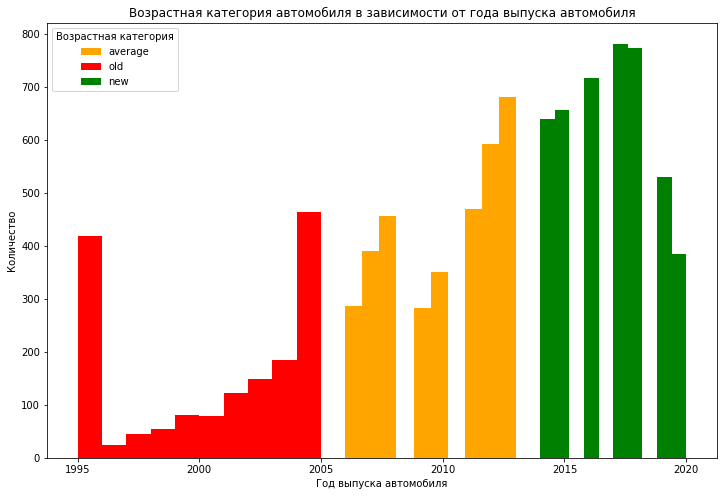

In [ ]:
# 4

colors = {'average': 'orange', 'old': 'red', 'new': 'green'}

fig, ax = plt.subplots(figsize=(12, 8))
for age_category in colors:
    color = colors[age_category]
    data = df[df['age_category'] == age_category]

    ax.hist(data['year'], color=color)

plt.ylabel('Количество')
plt.xlabel('Год выпуска автомобиля')
plt.title('Возрастная категория автомобиля в зависимости от года выпуска автомобиля')
plt.legend(colors, title="Возрастная категория");

### Задача 3.

In [ ]:
# 1

df['model_len'] = df.apply(lambda x: len(x.model) , axis=1)
df['model_len']

0       22
1       20
2       16
3        4
4       22
        ..
9614     4
9615     8
9616    25
9617     7
9618    22
Name: model_len, Length: 9619, dtype: int64

In [ ]:
# 2

df['model_len'].value_counts()

6      1004
5       900
7       724
8       681
4       647
       ... 
187       1
168       1
58        1
76        1
186       1
Name: model_len, Length: 65, dtype: int64

In [ ]:
# 3

df['model_word_count'] = df.apply(lambda x: len(x.model.split(' ')), axis=1)
df['model_word_count']

0       5
1       4
2       3
3       1
4       5
       ..
9614    1
9615    1
9616    5
9617    1
9618    5
Name: model_word_count, Length: 9619, dtype: int64

In [ ]:
# 4

df['model_word_count'].value_counts()

1     4289
2     2184
3     1355
4     1182
5      498
6       68
10       8
8        7
11       5
9        5
7        4
13       3
15       3
27       1
21       1
14       1
17       1
24       1
12       1
29       1
22       1
Name: model_word_count, dtype: int64

### Задача 4.

In [ ]:
# 1

manufacturer_names = ['audi', 'ford', 'chevrolet', 'toyota', 'jeep', 'honda', 'nissan']

for manufacturer in manufacturer_names:
    col_name = 'is_' + manufacturer

    df[col_name] = df.apply(lambda x: 1 if x.manufacturer == manufacturer else 0, axis=1)

In [ ]:
# 2

df.iloc[:, -7:]

,is_audi,is_ford,is_chevrolet,is_toyota,is_jeep,is_honda,is_nissan
0,0,0,0,0,0,0,0
1,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0
3,0,0,0,1,0,0,0
4,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...
9614,0,0,0,1,0,0,0
9615,0,0,0,0,1,0,0
9616,1,0,0,0,0,0,0
9617,0,0,0,0,0,0,0


In [ ]:
# 3

df[df['is_audi'] == 1]

,id,url,region,region_url,price,year,manufacturer,model,fuel,odometer,...,age_category,model_len,model_word_count,is_audi,is_ford,is_chevrolet,is_toyota,is_jeep,is_honda,is_nissan
58,7308399412,https://slo.craigslist.org/ctd/d/grover-beach-...,san luis obispo,https://slo.craigslist.org,9995,2010,audi,q5,gas,165714,...,average,2,1,1,0,0,0,0,0,0
104,7311352618,https://baltimore.craigslist.org/ctd/d/cockeys...,baltimore,https://baltimore.craigslist.org,33499,2018,audi,q7,gas,46529,...,new,2,1,1,0,0,0,0,0,0
125,7306308183,https://montgomery.craigslist.org/ctd/d/montgo...,montgomery,https://montgomery.craigslist.org,29590,2018,audi,q5 premium sport utility 4d,gas,34476,...,new,27,5,1,0,0,0,0,0,0
195,7315205542,https://denver.craigslist.org/ctd/d/littleton-...,denver,https://denver.craigslist.org,15598,2013,audi,a6,gas,81640,...,average,2,1,1,0,0,0,0,0,0
251,7302069239,https://indianapolis.craigslist.org/ctd/d/indi...,indianapolis,https://indianapolis.craigslist.org,38990,2018,audi,s5 premium plus sedan 4d,gas,40118,...,new,24,5,1,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9508,7313590324,https://reno.craigslist.org/cto/d/incline-vill...,reno / tahoe,https://reno.craigslist.org,28000,2014,audi,s6,gas,69000,...,new,2,1,1,0,0,0,0,0,0
9551,7316331812,https://indianapolis.craigslist.org/ctd/d/indi...,indianapolis,https://indianapolis.craigslist.org,10995,2011,audi,q7 premium plus,gas,140014,...,average,15,3,1,0,0,0,0,0,0
9559,7314775851,https://indianapolis.craigslist.org/cto/d/indi...,indianapolis,https://indianapolis.craigslist.org,13500,2012,audi,q5,gas,78000,...,average,2,1,1,0,0,0,0,0,0
9570,7316569161,https://chicago.craigslist.org/chc/cto/d/chica...,chicago,https://chicago.craigslist.org,8500,2009,audi,q7 3.6 premium quattro,gas,152000,...,average,22,4,1,0,0,0,0,0,0
